# Домашнее задание 1

Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

Задание 7: Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

* [I. Базовый анализ данных](#bda)
-- [Размерность датасетов](#1)
-- [Базовые статистики](#2)
-- [Анализ пропусков](#3)
* [II. Базовый анализ целевой переменной](#btva) 
-- [Целевая переменная в обучающем наборе](#target_train)
-- [Целевая переменная в тестовом наборе](#target_test)
* [III. Распределение признаков в зависимости от значения целевой переменной](#dist_TV) 
* [IV. Распределение основных статистик признаков](#dist)
* [V. Распределение коэффициентов корреляции между признаками](#corr)
* [Основны выводы](#conclusions)
* [V. Признаки с наибольшей нелинейной связью с целевой переменной](#nonlinear)
* [VII. Aнализ идентичности распределения признаков](#identity)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot, ks_2samp

from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
pd.options.display.max_columns=220

In [3]:
import warnings
warnings.filterwarnings('ignore')

[1]: бла-бла-бла

# I. Базовый анализ данных <a id="bda">

## 1. Размерность датасетов <a id="1">

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [6]:
print(f'train.shape = {train.shape[0]} rows, {train.shape[1]} cols')
print(f'test.shape = {test.shape[0]} rows, {test.shape[1]} cols')

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [7]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [8]:
test.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,2.6802,6.1565,14.3201,17.4594,5.3712,14.8984,5.8064,-10.0334,16.4220,30.7786,22.7696,9.8526,4.0207,3.8469,13.1617,13.2522,-12.4547,-1.9127,5.3696,6.9779,-17.9649,10.7856,0.2776,5.8071,10.4332,8.6681,0.9646,11.2181,11.8660,6.3732,-2.7215,13.3420,11.1627,11.6436,18.4112,-21.3080,10.0185,-32.6883,3.5985,16.4779,13.5237,19.5375,-9.2097,6.4420,-2.3080,5.9196,8.8332,7.2774,2.6084,9.0486,10.3683,-25.9187,-1.0702,-1.3391,6.1586,-1.8552,4.7364,15.6292,5.0223,-2.6639,11.0281,0.0306,1.8960,24.9906,32.5007,8.3094,7.6126,25.6503,7.2437,15.0479,7.7879,13.9172,-9.0753,4.8331,4.4553,15.6388,5.5637,4.2547,12.6840,0.0995,-1.8135,6.8214,9.3799,11.1513,9.6868,-0.1093,23.1655,8.3491,1.4743,-2.3265,0.0951,9.7517,28.6119,1.7091,13.6924,5.9843,7.0253,22.2816,14.2617,25.2567,1.9588,6.5321,2.9930,13.3917,0.4961,-0.6465,0.2973,9.7944,3.2861,-1.2859,29.1451,13.9596,-3.4051,13.9743,3.3887,12.2799,13.9287,4.0643,-0.3375,19.0097,12.9933,0.0775,6.6729,6.9553,6.7980,-16.6444,35.3246,21.9734,-2.6651,14.0376,-0.1133,11.9015,16.8878,12.5924,8.2578,6.1113,8.0605,8.7344,3.9054,3.1489,20.0401,15.7083,5.0690,20.4789,5.6559,7.0860,11.3302,-4.6820,12.0228,11.1629,21.4193,5.3269,6.8510,15.7062,-3.0267,21.8848,3.5995,-2.5442,3.7888,6.6096,-6.3101,2.2246,29.0310,5.0331,26.2206,14.3811,-4.5834,9.8823,12.3426,7.3865,-11.8810,10.4412,-0.9849,10.9760,12.3183,-2.7719,5.8820,8.5245,17.5356,1.0903,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,3.2618,-2.0445,13.8246,6.6547,5.0309,14.1999,8.5685,3.8190,11.4428,19.6761,22.4473,16.6921,5.5064,3.6160,10.4145,13.5557,0.0592,-1.8571,6.3351,6.4782,-15.0057,11.0107,1.1463,11.1037,11.7266,2.2244,1.3367,3.8213,2.7258,4.1475,-12.1092,23.2927,11.1598,11.4884,4.9641,-48.3446,12.1540,8.2999,10.1927,9.3731,11.2994,26.2671,1.9017,6.2642,10.4324,18.2401,17.9493,5.4887,-1.4498,7.9868,6.1265,-9.8509,3.6689,-0.1774,5.5691,2.9599,5.3306,14.8157,5.0154,-3.0839,11.1069,0.3795,8.5277,4.1178,41.1888,14.1070,7.8092,14.2418,4.2794,15.5445,12.1609,15.5275,-4.6090,7.3667,8.6763,18.6180,10.0517,19.1785,6.2420,7.0502,-28.9851,6.7225,17.3362,10.8515,16.2477,0.5921,22.7872,25.7310,1.7975,-2.0057,-6.1583,20.4441,21.8421,1.7256,8.5803,4.9388,8.8325,7.6675,14.0468,17.1160,6.3677,5.4146,1.9411,2.6129,3.4406,3.4260,2.3695,-8.9106,-13.8603,-2.0931,31.8407,13.8584,-3.2260,6.3128,5.8228,12

## 2. Базовые статистики <a id="2">

### Краткая сводка о первичных данных <a id="info">

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


### Оптимизация памяти <a id="memory">

In [11]:
def optimaze_dtype_for_numerics(df):
    
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    """
    если все значения ряда - целочисленные, то тип данных будет зависеть от необходимого типа данных 
    для экстремальных значений
    если имеются вещественные значения, то "минимально" возможным типом данных для всего ряда, 
    будет "максимальный" из необходимого типа данных для каждого значения  
    Из-за ряда проблем, которые могут возникнуть при использовании float16, опустим тот вариант хранения
    """
    
    for i in df.columns:
        Series = df[i]
        if str(Series.dtype)[:3] == 'int':
            n_type = np.promote_types(np.min_scalar_type(Series.max()), np.min_scalar_type(Series.min()))
        elif Series.map(lambda x: x.is_integer()).sum() == len(Series):
            n_type = np.promote_types(np.min_scalar_type(int(Series.max())), np.min_scalar_type(int(Series.min())))
        else:
            n_type = Series.map(lambda x: np.min_scalar_type(x)).max()
        if n_type == np.float16:
            n_type = np.float32
        df[i] = Series.astype(n_type)
    
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
                        
    return df

In [12]:
%%time
train_1 = optimaze_dtype_for_numerics(train.drop('ID_code', axis=1))

Memory usage of dataframe is 306.70 MB
Memory usage after optimization is: 152.78 MB
Decreased by 50.2%
Wall time: 1min 7s


In [13]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float32(200), uint8(1)
memory usage: 152.8 MB


In [14]:
test_1 = optimaze_dtype_for_numerics(test.drop('ID_code', axis=1))

Memory usage of dataframe is 305.18 MB
Memory usage after optimization is: 152.59 MB
Decreased by 50.0%


### Корреляции с целевой переменной <a id="corr_target">

In [15]:
train_1.corr()['target'].sort_values()

var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
             ...   
var_26     0.062422
var_53     0.063399
var_110    0.064275
var_6      0.066731
target     1.000000
Name: target, Length: 201, dtype: float64

### Анализ наличия дискретных признаков  <a id="discrete">

In [17]:
discrete_feature = [
    feature for feature in train_1.drop("target", axis = 1)
    if len(train[feature].unique())<25 
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 0


## 3. Анализ пропусков <a id="3">

In [18]:
pd.isna(train).sum().sum()

0

Пропущенных значений нет

# II. Базовый анализ целевой переменной <a id="btva">

### Целевая переменная в обучающем наборе <a id="target_train">

<AxesSubplot:ylabel='count'>

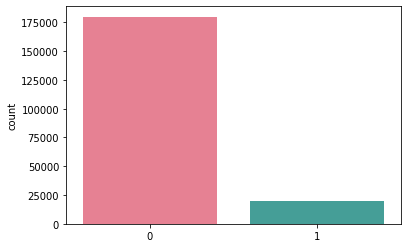

In [19]:
sns.countplot(train.target.values, palette="husl")

In [20]:
print(f'Доля целевой переменной со значением = 1 составляет {train_1["target"].sum()/len(train_1)*100}%')

Доля целевой переменной со значением = 1 составляет 10.049%


**Вывод**: задача для несбалансированного класса.

### Целевая переменная в тестовом наборе <a id="target_test">

Можно найти соотношение классов, а соответственно и количество экземпляров каждого класса в тестовой выборке для задач бинарной классификации с использованием в качестве метрики F-меры. Делается один инпут результатов, например, со всеми единицами. (т.е. используется 1 попытка в соревновании, куда вносится файл с ответами, где каждый экземпляр отмечен как класс "1")

In [21]:
def define_class_ratio(y_true, f):
    
    #f = f1_score(y_true, y_pred_1)
    ratio = 2*(1 - f)/f
    class_1 = int(len(y_true)/(ratio + 1))
    class_0 = len(y_true) - class_1
    
    #class_1 = ratio*len(y_true)/(ratio - 1)
    #class_0 = class_1*len(y_true)/ratio
    
    return class_0, class_1

Пока не могу сообразить можно ли аналогичную функцию написать если метрика ROC. Т.к. этот набор данных, насколько понимаю, из соревнования https://www.kaggle.com/c/santander-customer-transaction-prediction/, а там именно эта метрика.

In [22]:
print("Skewness: %f" % train_1['target'].skew())
print("Kurtosis: %f" % train_1['target'].kurt())

Skewness: 2.657642
Kurtosis: 5.063112


### Target - index

Text(0, 0.5, 'Index')

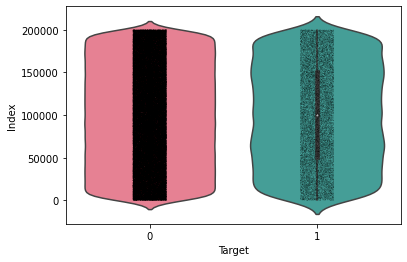

In [23]:
fig = plt.figure(figsize=(6,4))
sns.violinplot(x=train.target.values, y=train.index.values, palette="husl")
sns.stripplot(x=train.target.values, y=train.index.values,
              jitter=True, color="black", size=0.5, alpha=0.5)
plt.xlabel("Target")
plt.ylabel("Index")

Нет связи целевой переменной с индексом фрейма, наблюдается равномерное распределение по индексам. Может указывать на то, что данные смоделированны.

https://www.kaggle.com/allunia/santander-customer-transaction-eda#What-can-we-say-about-the-target?-

# III. Распределение признаков в зависимости от значения целевой переменной <a id="dist_TV">

In [24]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

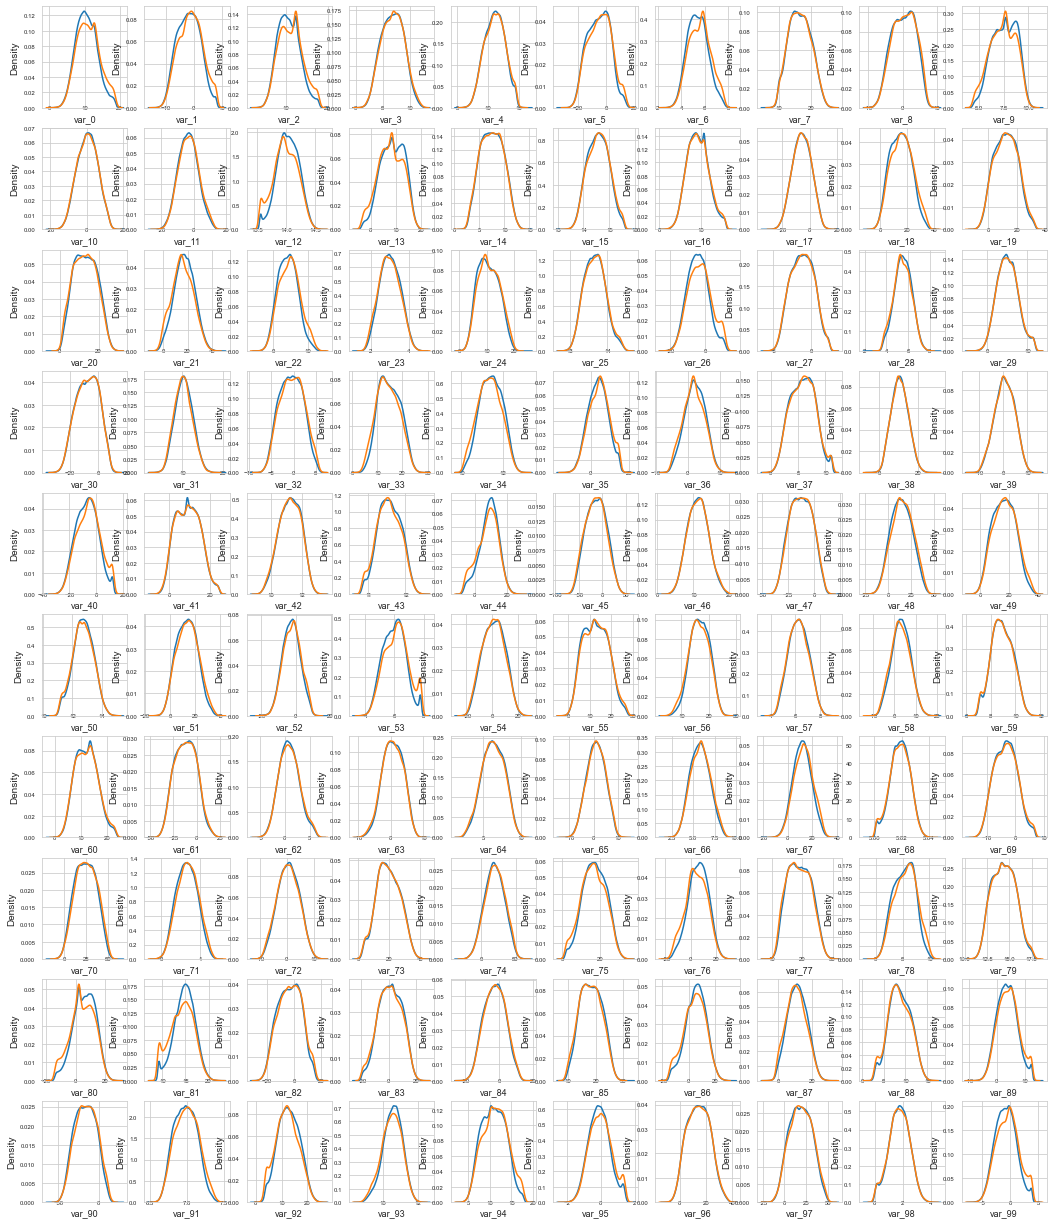

Wall time: 2min


In [25]:
%%time
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

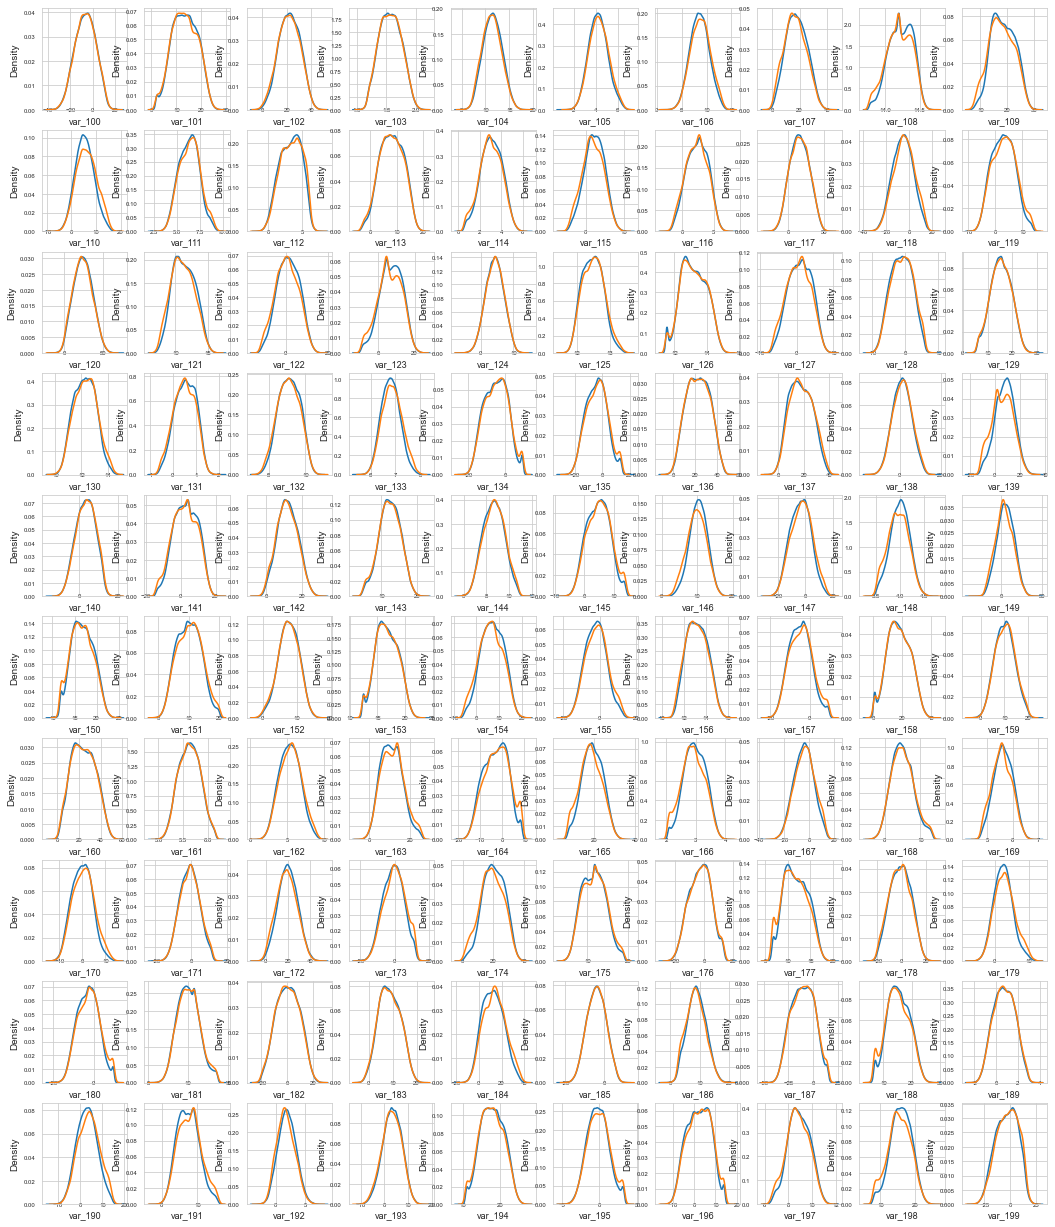

Wall time: 2min 3s


In [26]:
%%time
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

**Вывод**: можно видеть что есть немалое количество признаков со заметной разницей в распределениях для двух значений целевой переменной (var_0, var_2, var_6, var_12, var_13  и др.)

# IV. Распределение основных статистик признаков <a id="dist">

### Распределение mean для строк

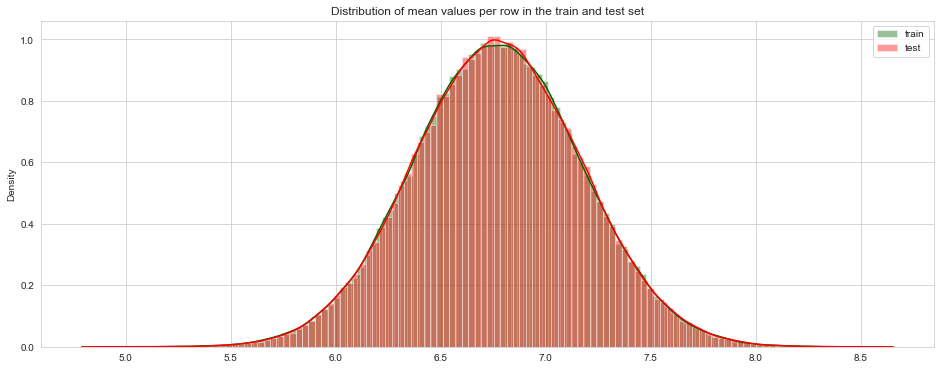

In [35]:
plt.figure(figsize=(16,6))
features = train_1.columns.values[1:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_1[features].mean(axis=1),color="darkgreen", kde=True,bins=120, label='train')
sns.distplot(test_1[features].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

### Распределение mean для столбцов

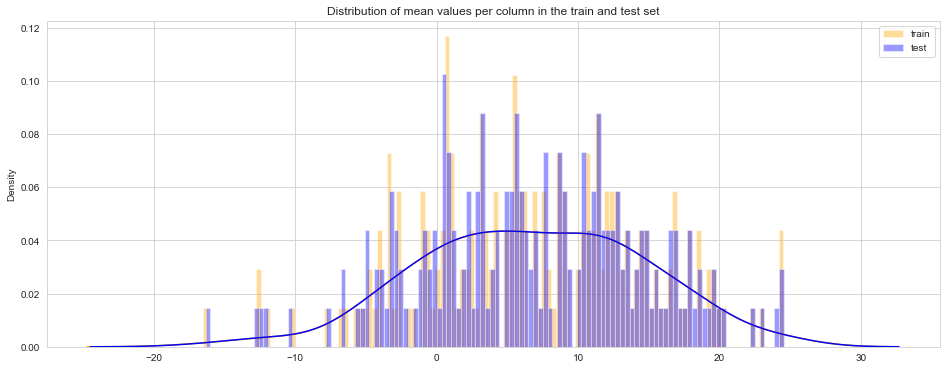

In [36]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_1[features].mean(axis=0),color="orange",kde=True,bins=120, label='train')
sns.distplot(test_1[features].mean(axis=0),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

### Распределение СКО для строк

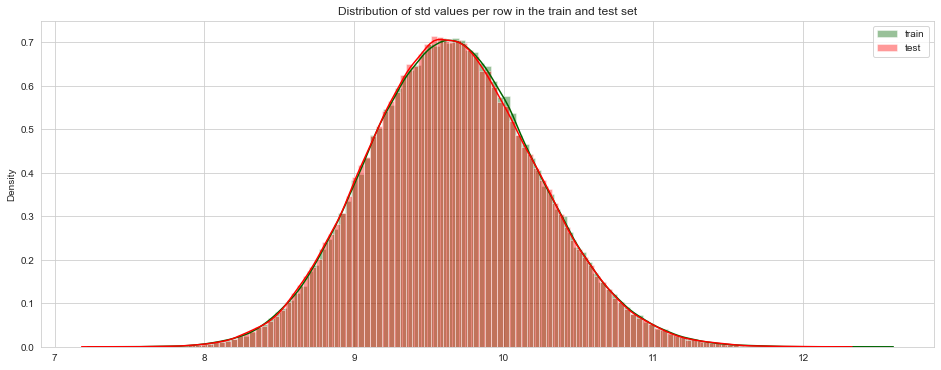

In [37]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_1[features].std(axis=1),color="darkgreen", kde=True,bins=120, label='train')
sns.distplot(test_1[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

### Распределение СКО для столбцов

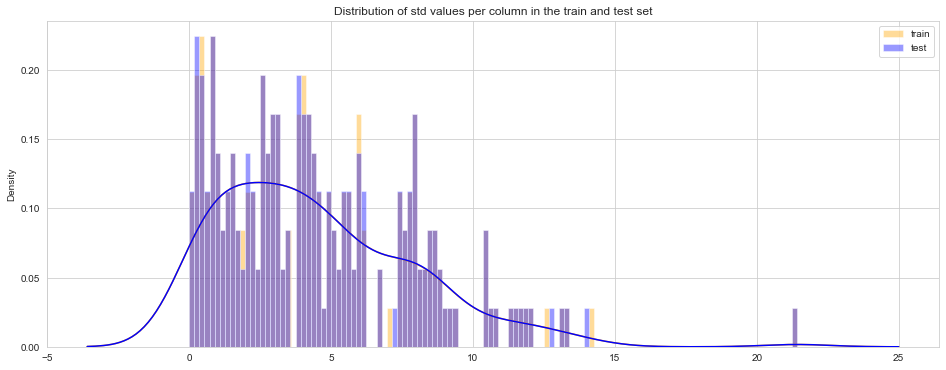

In [38]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_1[features].std(axis=0),color="orange",kde=True,bins=120, label='train')
sns.distplot(test_1[features].std(axis=0),color="blue", kde=True,bins=120, label='test')
plt.legend(); plt.show()

# V. Распределение коэффициентов корреляции между признаками <a id="corr">

Чтобы не строить корреляционную матрицу для 200 параметров, проверим есть ли вообще значимые корреляции между признаками.

In [39]:
%%time
correlation = numerical_features.corr()

Wall time: 23.6 s


Уберем диагональные коээфициенты

In [40]:
correlation.values[[np.arange(correlation.shape[0])]*2] = None

In [41]:
correlation

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,NaN,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,-0.004090,0.049530,-0.001298,-0.008365,-0.028557,-0.049039,-0.020065,0.005690,0.008983,0.032334,0.030612,-0.013900,0.025992,0.027754,0.063399,-0.015796,0.017176,-0.035000,-0.015468,-0.024277,-0.010448,0.006265,0.007407,0.013888,-0.014670,-0.013805,0.011214,0.023114,0.044673,-0.011957,0.008283,0.026748,0.033607,-0.013005,-0.006460,0.019926,-0.038081,-0.061917,-0.017459,0.048245,0.007591,-0.057609,-0.080917,0.022574,-0.020528,0.012363,-0.024513,-0.039126,-0.035860,-0.020677,0.039369,0.029395,0.040127,-0.046295,-0.035070,0.046296,0.038531,0.003037,0.015224,-0.004074,0.058367,0.002215,-0.009138,-0.018329,-0.001395,-0.026605,0.025604,0.032947,-0.039997,-0.044791,-0.049926,0.064275,0.026686,0.023694,-0.013681,-0.026266,-0.050174,-0.023448,0.002591,0.040358,0.030975,-0.010895,-0.039788,-0.042461,-0.040291,0.004218,0.028223,0.001393,-0.039125,0.026909,-0.005880,0.029917,-0.032380,-0.024510,0.054548,0.017213,0.027944,-0.003554,0.027190,0.018328,-0.074080,0.015301,-0.029701,-0.018901,-0.011202,0.021208,0.030917,-0.063644,0.040280,-0.055011,-0.047319,-0.025821,0.027524,-0.010773,-0.007103,-0.046106,0.037240,-0.020997,0.032642,-0.003817,0.015278,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,NaN,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,-0.002514,

Найдем максимальный и минимальный коэффициенты.

In [42]:
correlation.max().max(), correlation.min().min()

(0.06673084520456934, -0.08091733225137161)

Видно, что коэффициенты корреляции крайне малы, так что строить матрицу нет смысла.

Проверим отсутстви корреляции между признаками, вычислив все значения корреляции и построив график общего распределения:

Wall time: 49.6 s


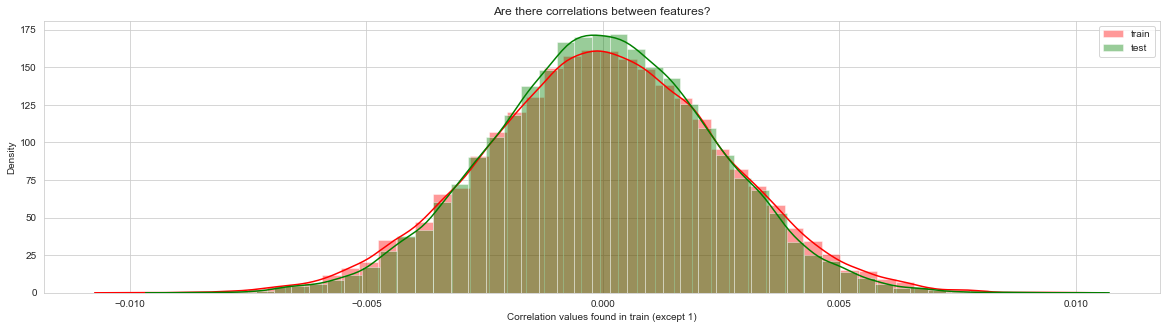

In [48]:
%%time
train_correlations = train_1.drop(["target"], axis=1).corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

test_correlations = test_1.corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Red", label="train")
sns.distplot(test_correlations, color="Green", label="test")
plt.xlabel("Correlation values found in train (except 1)")
plt.ylabel("Density")
plt.title("Are there correlations between features?"); 
plt.legend();

# Основные выводы <a id="conclusions)">

1. Размер тренировочного и тестового набора данных равны.
2. Задача несбалансированной классификации. Соотношение классов 9 к 1.
3. Все признаки являются числовыми анными и непрерывными. 
4. Все признаки не имеют линейной корреляции! (ни в обучающем, ни в тренировочном наборе данных). Довольно странно, для такого большого набора признаков. Возможно, они специально декоррелированы.
5. Пропущенные значения и выбросы отсутствуют.
6. Скорее всего это "ненатуральные" данные. Либо смоделированные, либо первоначальные реальные данные были подвергнуты специальной обработке.

# VI. Признаки с наибольшей нелинейной связью с целевой переменной <a id="nonlinear">

Cлучайный лес ля наожения 10 наиболее значимых признаков

In [50]:
target = train['target']

In [60]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(train_1.drop('target', axis=1), target)

Wall time: 5min 8s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

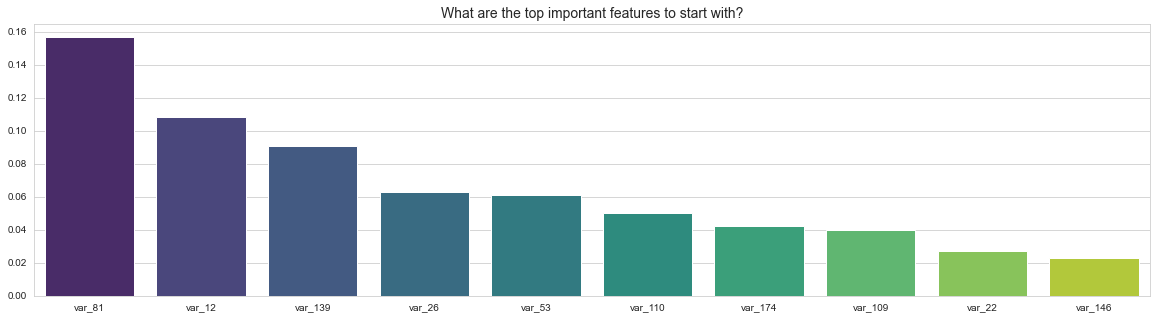

In [61]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train_1.drop('target', axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

# VII. Aнализ идентичности распределения признаков <a id="identity">

### Kolmogorov-Smirnov Test

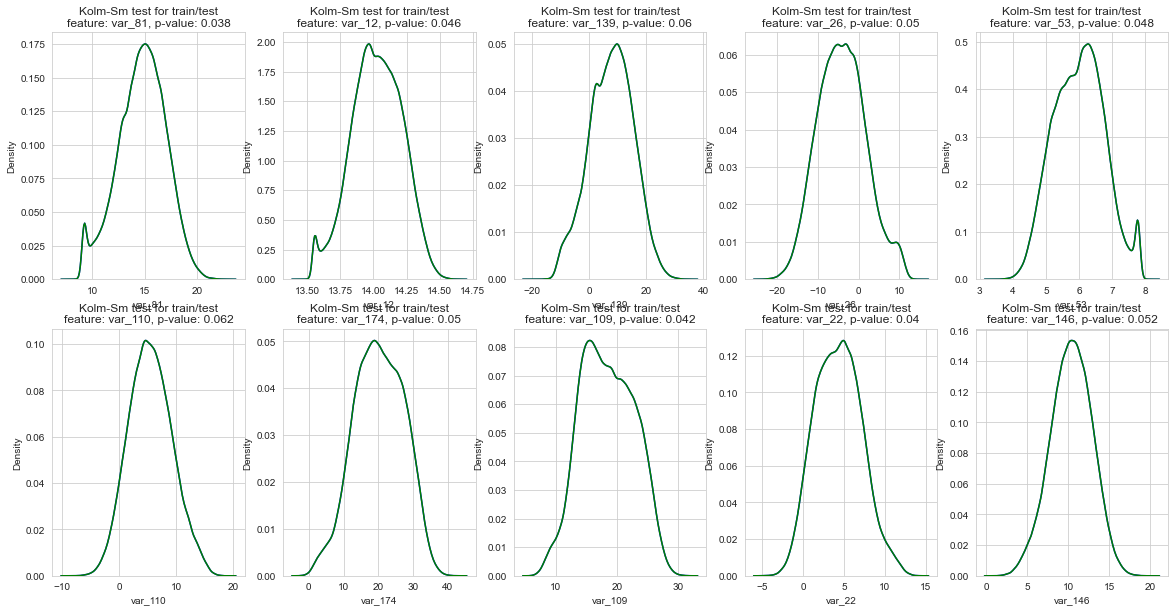

In [63]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test_1[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolm-Sm test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )